<a href="https://colab.research.google.com/github/Harshcs2002/OIBSIP/blob/main/Task4/Emailspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OIBSIP
## TASK 4
## EMAIL SPAM DETECTION WITH MACHINE LEARNING
### using logistic regression
### Author - Harsh Jaiswal

In [2]:
# downloading the dataset
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 110MB/s]


In [6]:
! unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import io

In [11]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

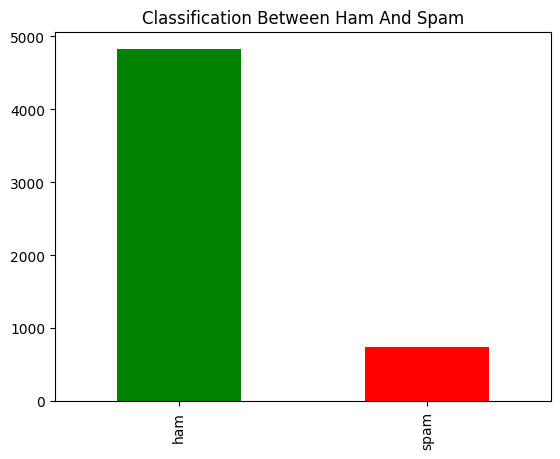

In [15]:
df_classify=pd.value_counts(df["v1"])
df_classify.plot(kind="bar",color= ["green", "red"])
plt.title("Classification Between Ham And Spam")
plt.show()

In [16]:
for i in range(0,5572):
    if df['v1'][i]=='spam':
        df['v1'][i]=1
    else:
        df['v1'][i]=0

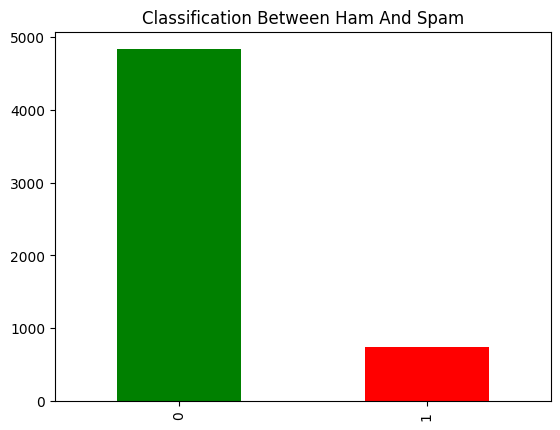

In [17]:
df_classify=pd.value_counts(df["v1"])
df_classify.plot(kind="bar",color= ["green", "red"])
plt.title("Classification Between Ham And Spam")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df.v2, df.v1,test_size=0.3, random_state=42 )
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
x_train_new= cv.fit_transform(x_train)

In [19]:
print(x_train,y_train)

708     To review and KEEP the fantastic Nokia N-Gage ...
4338                   Just got outta class gonna go gym.
5029    Is there coming friday is leave for pongal?do ...
4921    Hi Dear Call me its urgnt. I don't know whats ...
2592    My friend just got here and says he's upping h...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: v2, Length: 3900, dtype: object 708     1
4338    0
5029    0
4921    0
2592    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: v1, Length: 3900, dtype: object


In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [21]:
y_train=y_train.astype(int)
x_train_new=x_train_new.astype(int)
x_train_new
y_test=y_test.astype(int)

In [23]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train_new, y_train)
lr_pred= lr.predict(cv.transform(x_test))
lr_cm= confusion_matrix(y_test, lr_pred)

In [24]:
f1_score(y_test, lr_pred)

0.9090909090909092

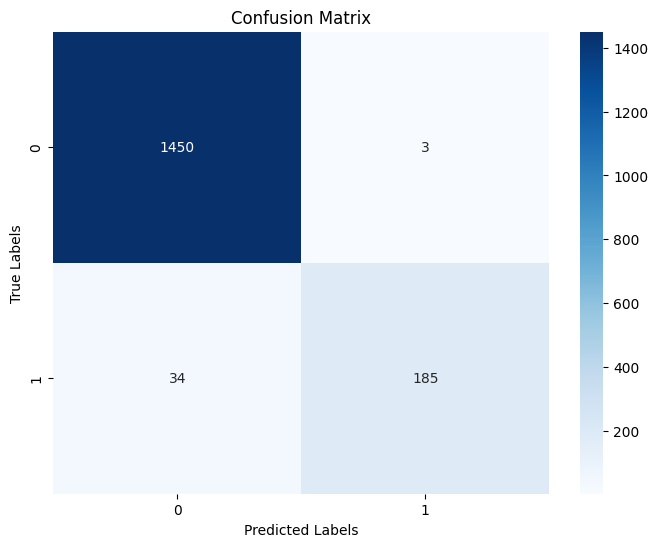

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()